In [22]:
import pyforest
import sklearn
import numpy as np
import pandas as pd 
import pandas.plotting
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [23]:
iris = pd.read_csv("D:/Project/iris project/Iris.csv")

In [24]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

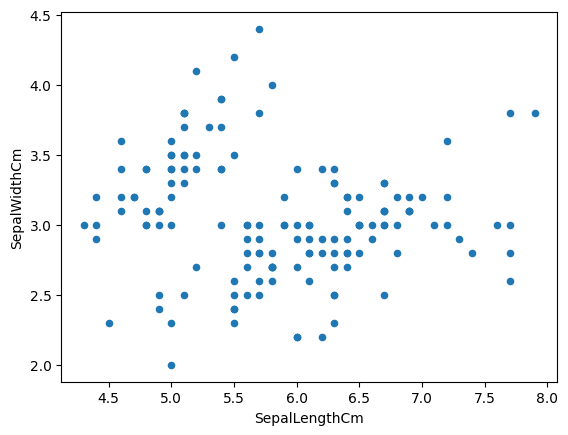

In [26]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

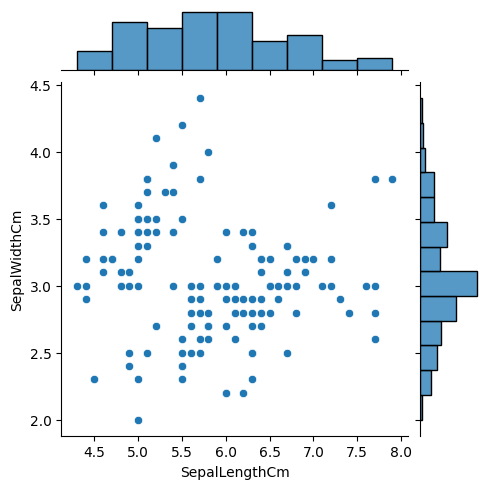

In [27]:
sns.jointplot(x= "SepalLengthCm", y = "SepalWidthCm", data = iris, size=5) 

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

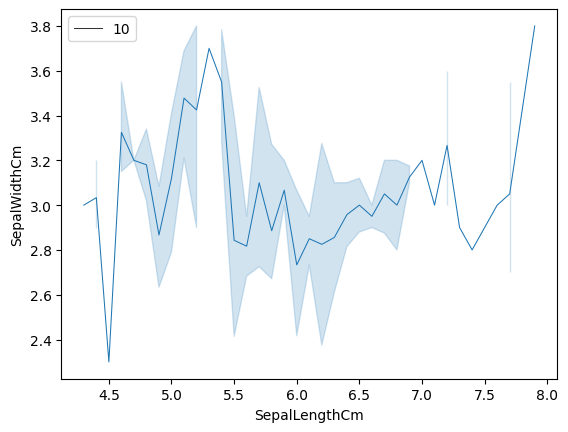

In [28]:
sns.lineplot(x= "SepalLengthCm", y = "SepalWidthCm",data= iris, size= 10)


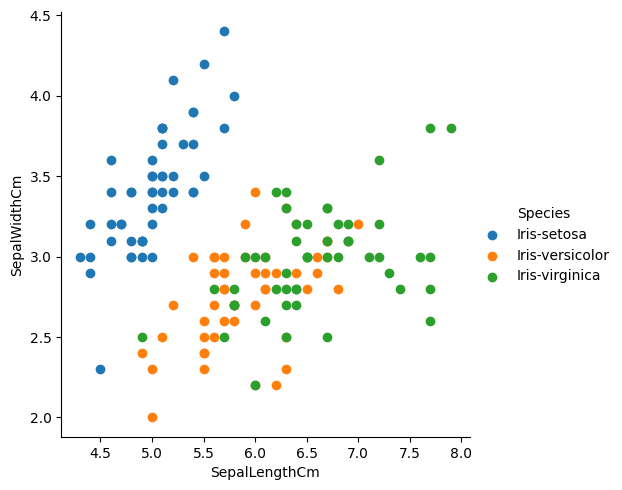

In [29]:
sns.FacetGrid(iris, hue = "Species", size = 5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

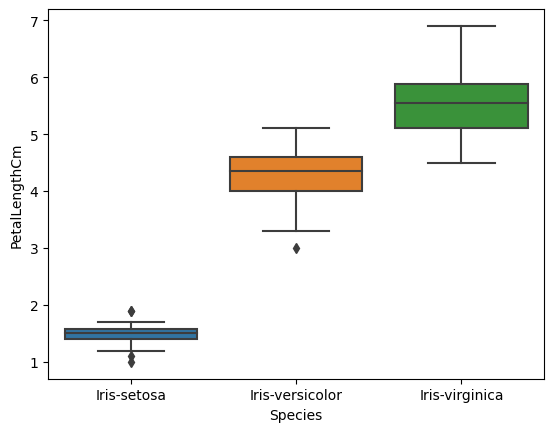

In [30]:
sns.boxplot(x="Species", y="PetalLengthCm",data=iris)

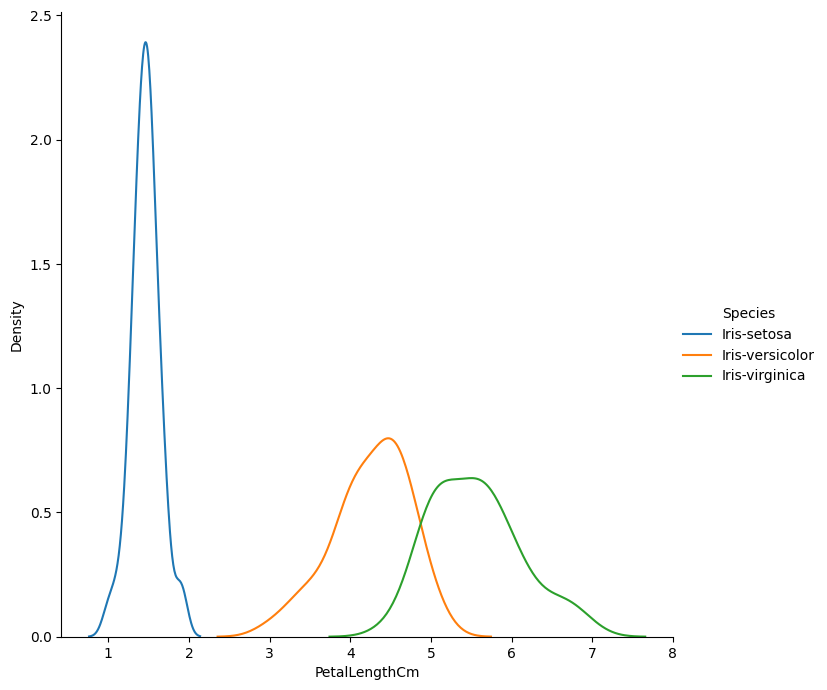

In [31]:
sns.FacetGrid(iris, hue= "Species", size = 7) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

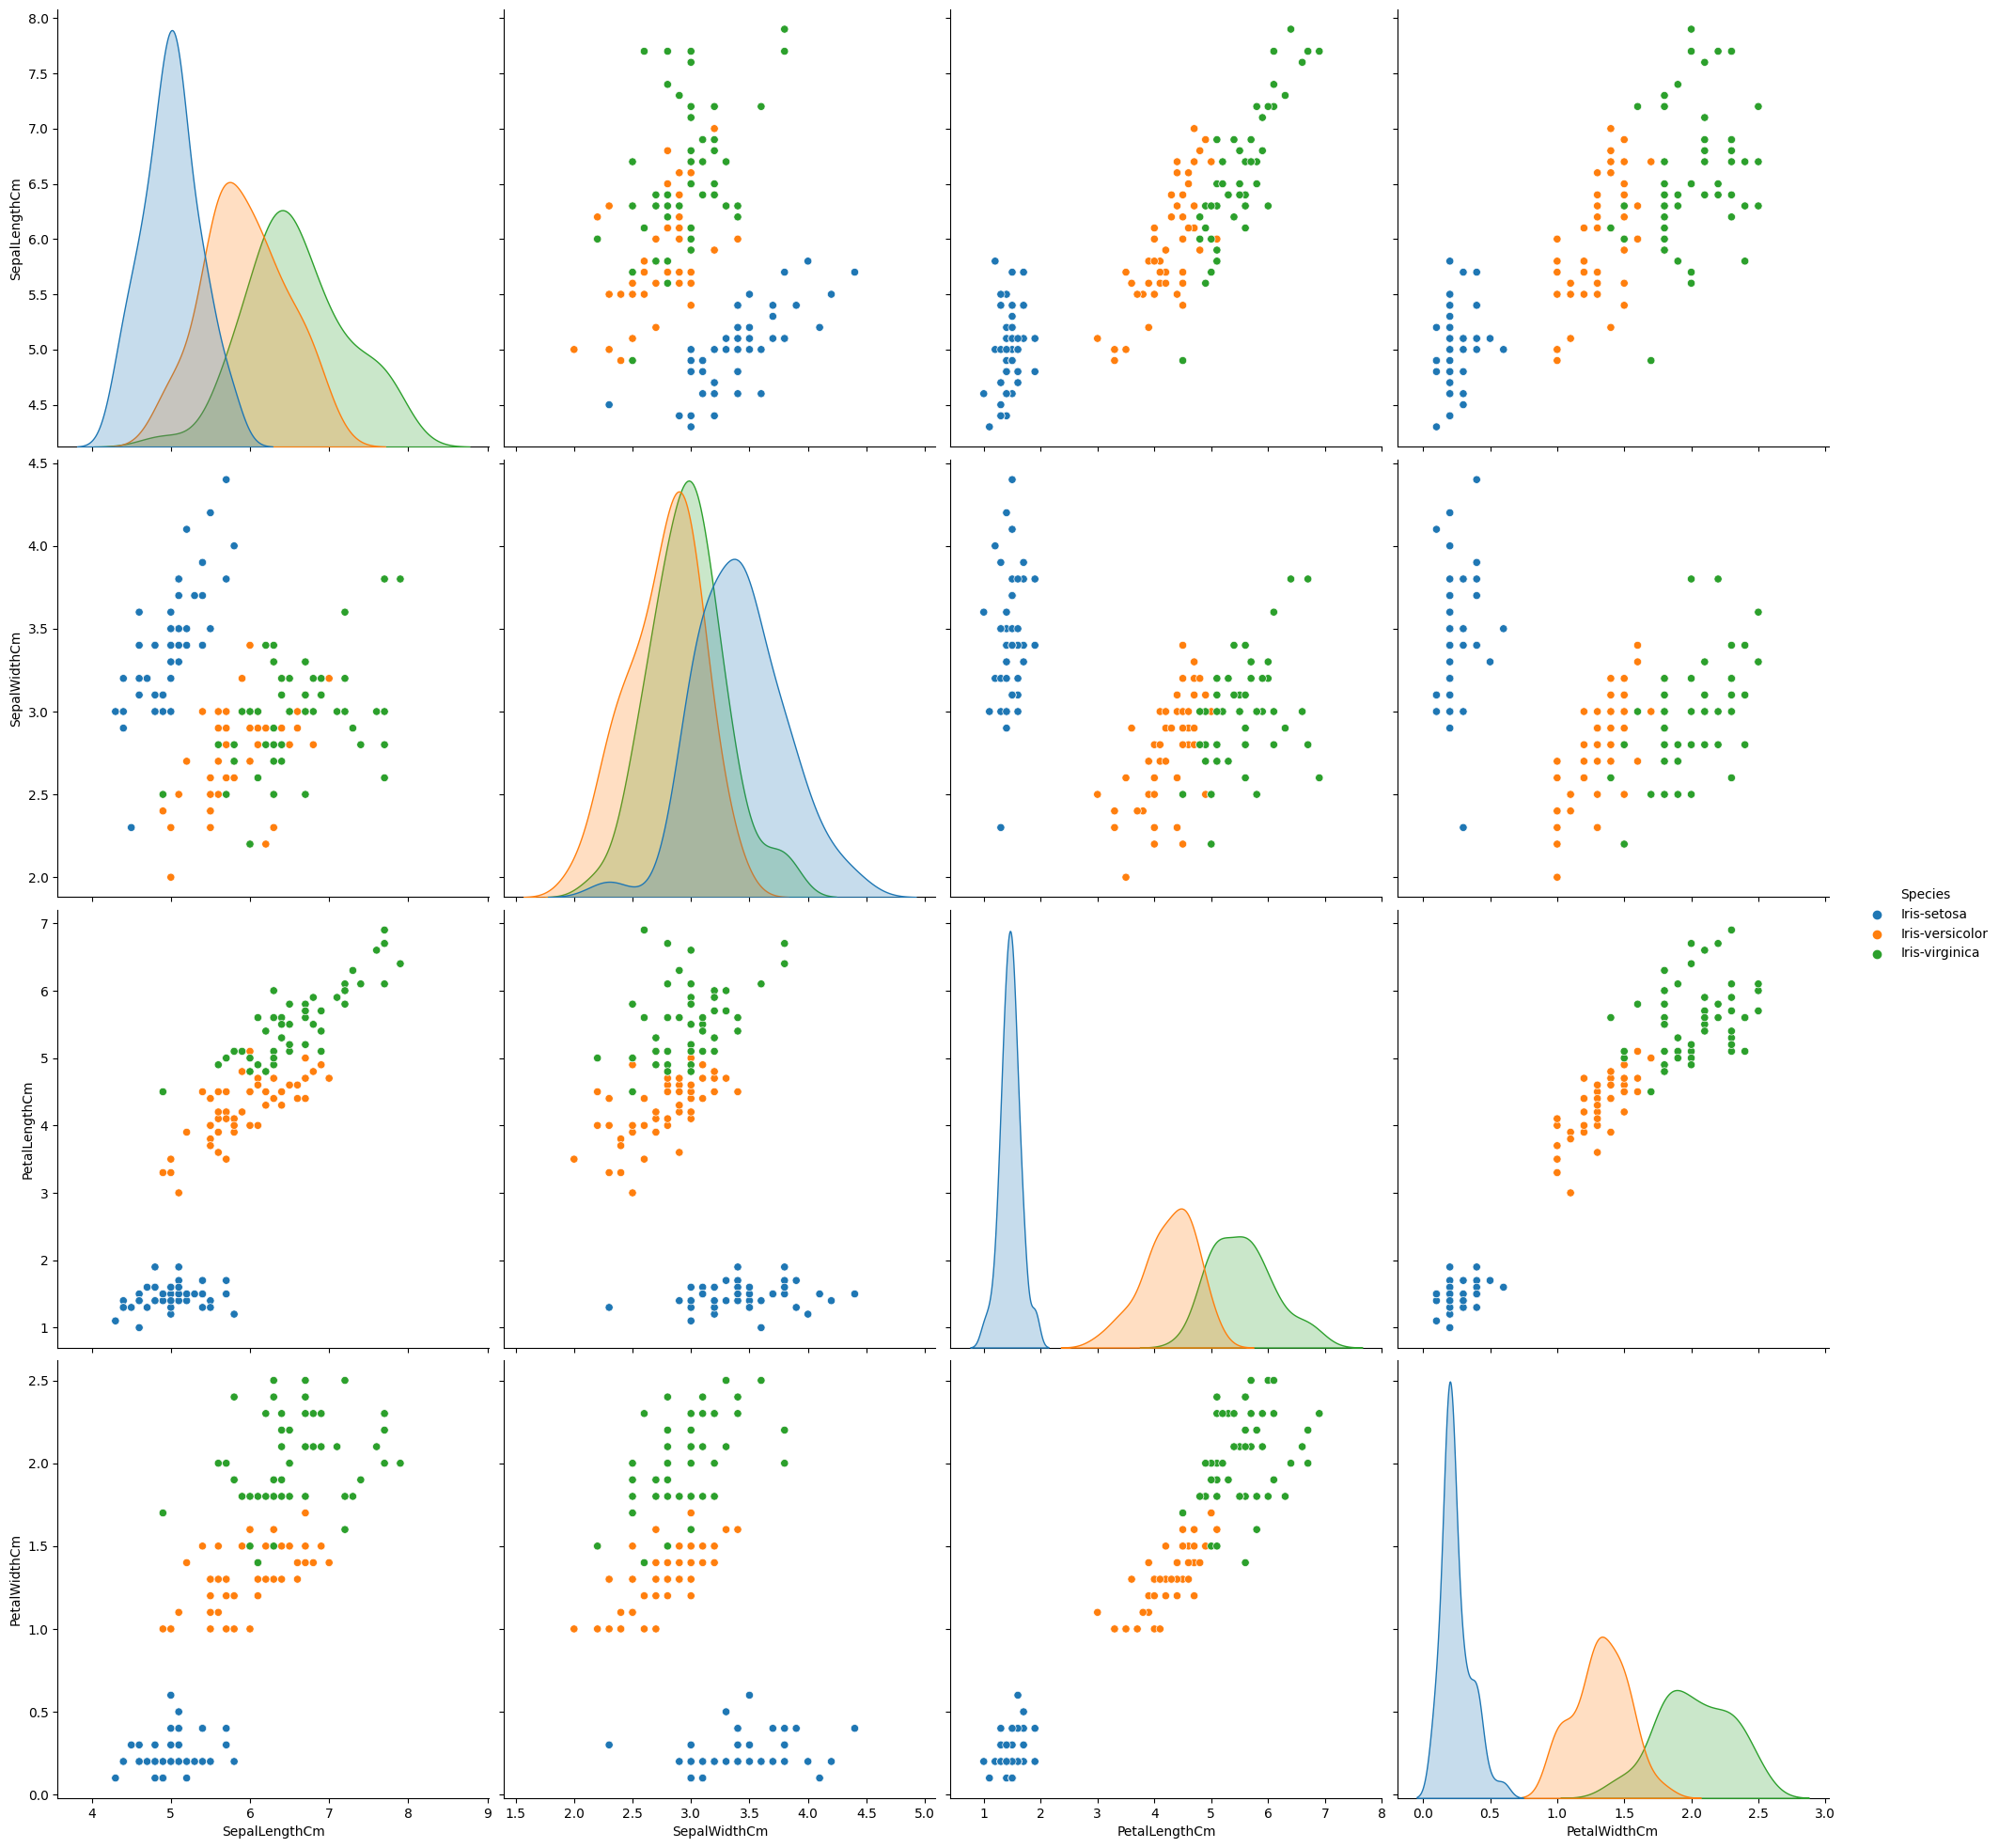

In [32]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=5)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

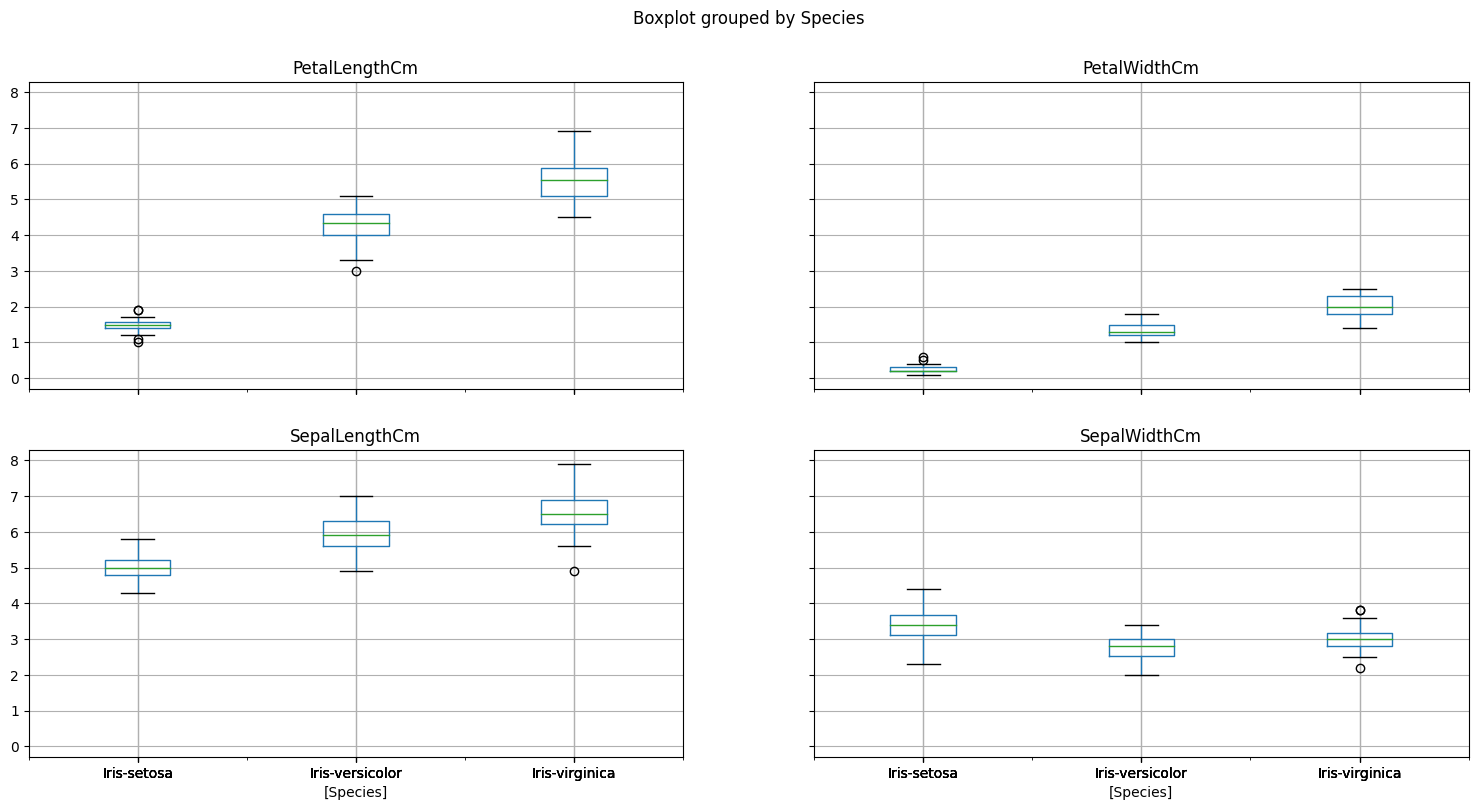

In [33]:
iris.drop("Id", axis=1) .boxplot(by = "Species", figsize=(18,9))

<AxesSubplot:>

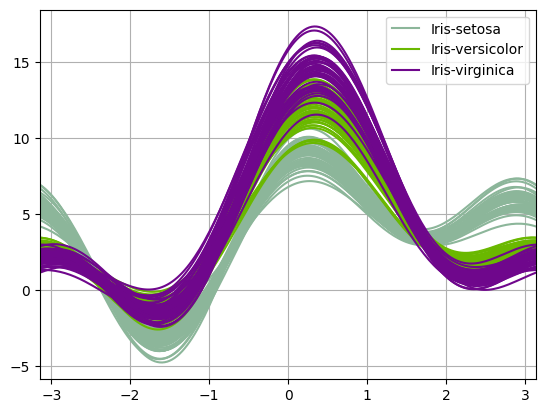

In [37]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<AxesSubplot:>

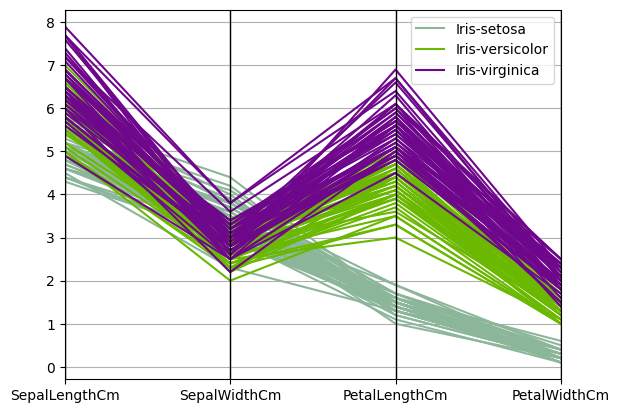

In [38]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis =1),"Species")

<AxesSubplot:>

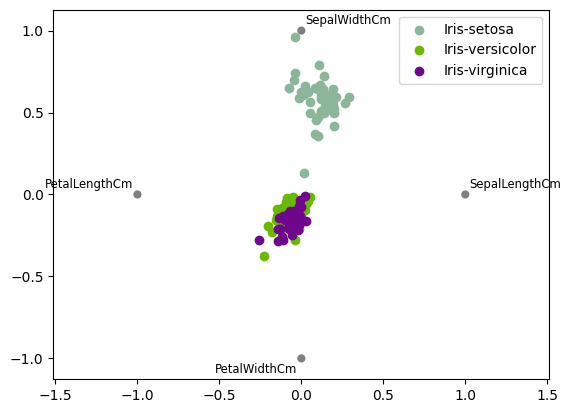

In [43]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1),"Species" )

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# iris with alorithms

In [40]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<IPython.core.display.Javascript object>

In [59]:
classifier = LogisticRegression()
classifier.fit (X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report( y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print ("accuracy is", accuracy_score(y_pred, y_test))

<IPython.core.display.Javascript object>

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print (y_pred, y_test)    
    

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa'] ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virgin

In [47]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [48]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

classifier= GaussianNB()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [50]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.83        30
      macro avg       0.82      0.84      0.82        30
   weighted avg       0.85      0.83      0.84        30

[[10  1  0]
 [ 0 10  3]
 [ 0  1  5]]


In [53]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         0
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       1.00      0.20      0.33        30

       accuracy                           0.20        30
      macro avg       0.33      0.07      0.11        30
   weighted avg       1.00      0.20      0.33        30

[[ 0  0  0]
 [ 0  0  0]
 [11 13  6]]


In [56]:
classifier = ComplementNB()
classifier.fit(X_train, y_train)

Y_pred=classifier.predict(X_test)

print(classification_report(Y_pred,y_test))
print(confusion_matrix(Y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.69      0.81        16
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       1.00      0.43      0.60        14

       accuracy                           0.57        30
      macro avg       0.67      0.37      0.47        30
   weighted avg       1.00      0.57      0.71        30

[[11  5  0]
 [ 0  0  0]
 [ 0  8  6]]


In [90]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("-"*40)
    print(name)

    train_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, train_pred)
    print("Accuracy: {:4%}".format(acc))
    print("-"*40)
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)

----------------------------------------
GaussianNB
Accuracy: 100.000000%
----------------------------------------
----------------------------------------
MultinomialNB
Accuracy: 83.333333%
----------------------------------------
----------------------------------------
BernoulliNB
Accuracy: 20.000000%
----------------------------------------
----------------------------------------
ComplementNB
Accuracy: 56.666667%
----------------------------------------


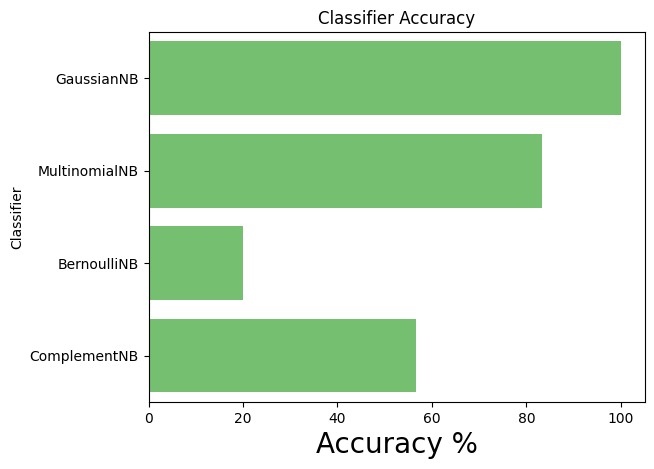

In [109]:
sns.set_color_codes('muted')
sns.barplot(x ="Accuracy", y= "Classifier", data = log , color = 'g')

plt.xlabel("Accuracy %", size = 20)
plt.title("Classifier Accuracy")
plt.show()

